In [1]:
import cv2
import numpy as np
import os


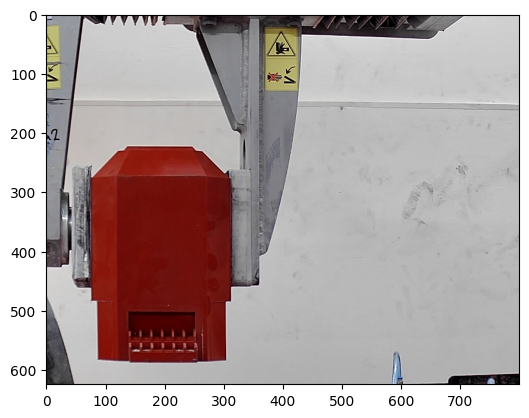

In [2]:
# Load the image and show in jupyter
img = cv2.imread('crop_test.jpg')

# Show the image in a jupyter notebook
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

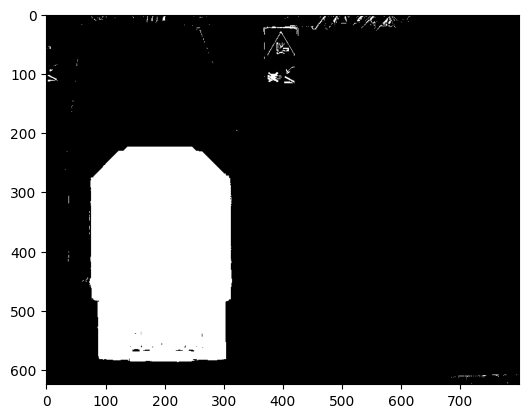

In [3]:
# Převod obrázku do HSV prostoru
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# create mask
mask1 = cv2.inRange(hsv, (0,100,0), (20,255,255))
mask2 = cv2.inRange(hsv, (175,130,0), (180,255,130))

# apply mask
mask_combined = mask1 + mask2

# Najít kontury v masce
contours, _ = cv2.findContours(mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.cvtColor(mask_combined, cv2.COLOR_BGR2RGB))
plt.show()

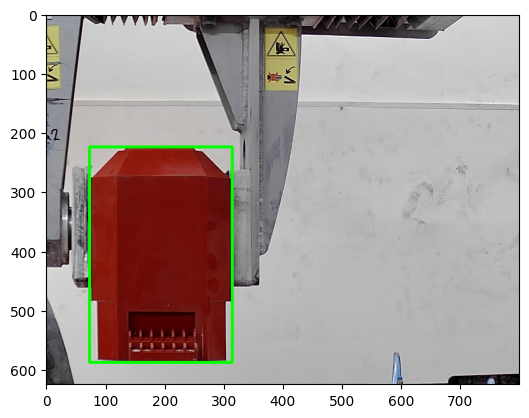

In [4]:
# Filtrace kontur podle minimální velikosti
large_contours = []  # Seznam pro velké kontury
min_area=5000  # Minimální plocha kontury pro zahrnutí
for contour in contours:
    area = cv2.contourArea(contour)
    
    # Pokud je kontura dostatečně velká, přidej ji do seznamu
    if area > min_area:
        large_contours.append(contour)

# Pro nakreslení kontur na obrázku
img_contours = img.copy()

for contour in large_contours:
    # Získání obdélníku, který obklopuje konturu
    x, y, w, h = cv2.boundingRect(contour)
    
    # Kreslení obdélníku na obrázku
    cv2.rectangle(img_contours, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Zobrazení obrázku s nakreslenými konturami
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.show()

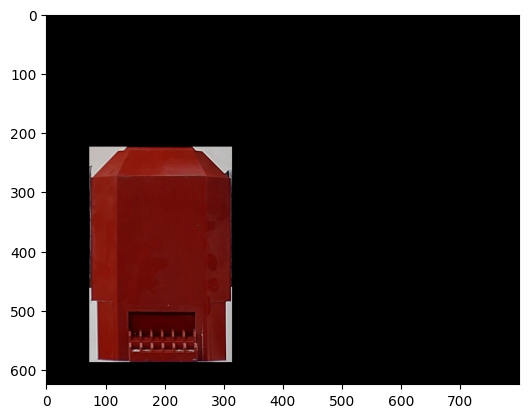

In [5]:
# Vytvoření masky pro vybranou oblast mimo bounding boxu
mask = np.zeros_like(img)
mask[y:y+h, x:x+w] = img[y:y+h, x:x+w]
img = cv2.bitwise_and(img, mask)

# Zobrazení obrázku s nakreslenými konturami
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Celková plocha kontur: 78309.0 px


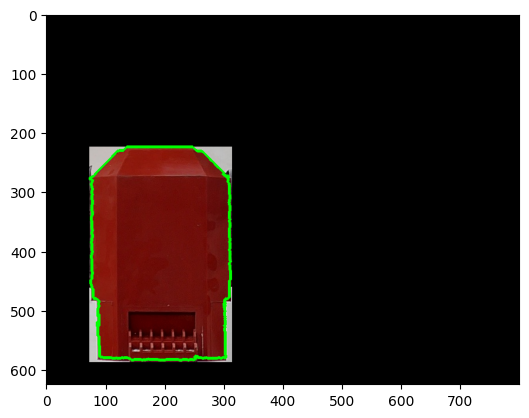

In [6]:
# Definice rozsahu pro maskování
lower_hsv = np.array([0, 40, 30])
upper_hsv = np.array([20, 255, 255])
# Převod obrázku do HSV prostoru
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Vytvoření masky podle definovaných HSV rozsahů
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Najít kontury v masce
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrace kontur podle minimální velikosti
large_contours = []  # Seznam pro velké kontury
sum_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    # Pokud je kontura dostatečně velká, přidej ji do seznamu
    if area > min_area:
        large_contours.append(contour)
        sum_area += area
        
# Pro nakreslení kontur na obrázku
img_contours = cv2.drawContours(img.copy(), large_contours, -1, (0, 255, 0), 3)
print("Celková plocha kontur:", sum_area, "px")
# Zobrazení obrázku s nakreslenými konturami
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.show()

Kontura: Šířka = 237 px, Výška = 361 px


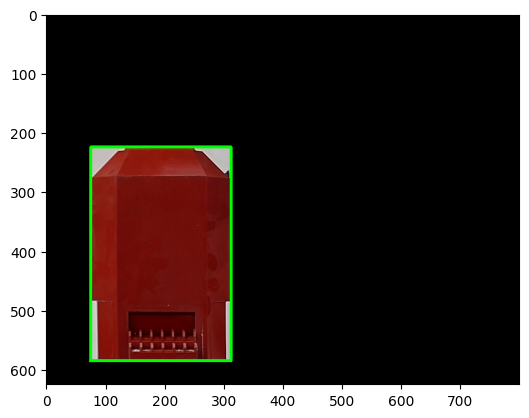

In [7]:
# Převod obrázku do HSV prostoru
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definice rozsahu pro maskování
lower_hsv = np.array([0, 78, 3])
upper_hsv = np.array([17, 255, 255])

# Vytvoření masky podle definovaných HSV rozsahů
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Najít kontury v masce
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrace kontur podle minimální velikosti
large_contours = []  # Seznam pro velké kontury
for contour in contours:
    area = cv2.contourArea(contour)
    
    # Pokud je kontura dostatečně velká, přidej ji do seznamu
    if area > min_area:
        large_contours.append(contour)

# Pro nakreslení kontur na obrázku
img_contours = img.copy()

# Pro každou konturu v seznamu velkých kontur
w = 0
h = 0
for contour in large_contours:
    # Získání obdélníku, který obklopuje konturu
    x, y, w, h = cv2.boundingRect(contour)
    
    # Kreslení obdélníku na obrázku
    cv2.rectangle(img_contours, (x, y), (x + w, y + h), (0, 255, 0), 3)




print(f"Kontura: Šířka = {w} px, Výška = {h} px")
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.show()